In [0]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [0]:
os.chdir('U:\\More Data')

In [0]:
x=pd.read_excel('LUSC_250_NoDepth.xlsx',index_col=0) 
y=pd.read_excel('survival_LUSC.xlsx')

In [0]:
from sklearn.model_selection import train_test_split
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, TCGA-94-7033-01 to TCGA-77-7140-01
Columns: 251 entries, CXORF67 to Tissue Source Site
dtypes: float64(247), int64(4)
memory usage: 630.0+ KB


In [0]:
#a#applyign linear regression model
lassoReg=Lasso(alpha=50,normalize=False)
lassoReg.fit(X_train, y_train) #training the algorithm

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#predicting on validation split

y_predval = lassoReg.predict(X_val)

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

22.69099616462065
866.7271936450913
29.440230869425793
Variance score: 0.06


In [0]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[ 0.02021474  0.03549112 -0.08005195 -0.01468909  0.11690793 -0.04556593
  0.08343807  0.02365508 -0.10247765 -0.02809605]
0.0008826256862483727 0.06545288239762856


In [0]:
'positive':[False,True]
'warm_start':[False,True],
'precompute':[False,True]

In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                     'max_iter':[1,2,5,10,20],
                     'random_state':[0,1,42],
                    'tol':[0.001,0.1,0.5]}
lassoReg=Lasso()
grid=GridSearchCV(lassoReg,tuned_parameters,scoring='r2',verbose=1,cv=10)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
print(grid.best_params_)

{'alpha': 20, 'fit_intercept': True, 'max_iter': 5, 'random_state': 0, 'tol': 0.001}


In [0]:

lassoReg=Lasso(alpha= 20, fit_intercept= True, max_iter=5, random_state= 0, tol= 0.001)
lassoReg.fit(X_train,y_train)
y_predval=lassoReg.predict(X_val)


In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

22.7325388802832
843.7112327433213
29.046707778048123
Variance score: 0.09


In [0]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[ 0.03853297  0.11306957 -0.1192392  -0.03782179  0.20871544 -0.02284385
  0.16216562  0.02301598 -0.14802883 -0.03794325]
0.017962267263976928 0.10997962746458848


In [0]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
lassoReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lassoReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lassoReg.score(X_test, y_test))


23.792966213662375
908.6611542193597
30.144006937024145
Variance score: 0.08


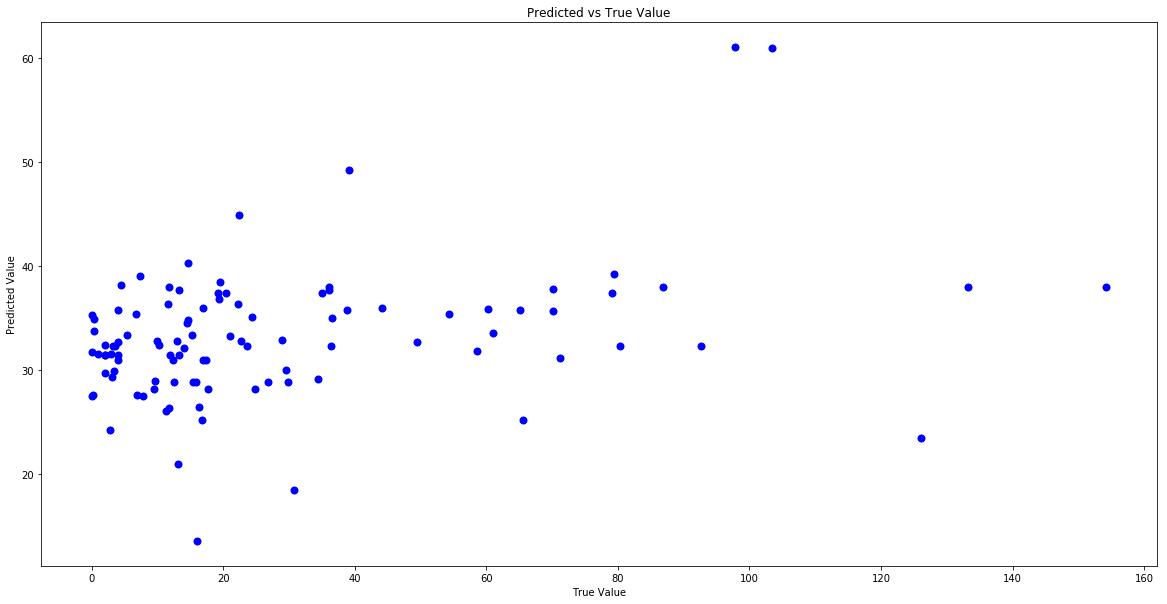

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()